___
# <font color= #d4b1e6> **Proyecto 1: Fashion-MNIST** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Lucía Beltrán, Priscila Cervantes Ramírez, Mónica Ibarra Herrera & Antonia Horburger` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Aprendizaje Máquina` </font>
___

A continuación, se trabajará con el dataset de Fashion-MNIST, un dataset que contiene imágenes de 10 diferentes clases de prendas, cuenta con 60,000 imágenes de entrenamiento y 10,000 de prueba.

Se utlizarán 5 diferentes modelos para clasificar entre las 10 clases de prendas que contiene el dataset:

- Regresión Logística
- Support Vector Machine (SVM)
- Random Forest
- Redes Neuronales (MLP)
- CNN


De los diferentes modelos que se elaborarán, se obtendrán las siguientes métricas para evaluar el desemepeño para concluir cuál fue el mejor modelo:

- Exactitud(Accuracy): Mide el porcentaje de predicciones correctas sobre el total de predicciones.
- Precisión (Precision): Mide de todas las predicciones positivas que hizo el modelo, qué porcentaje realmente eran positivas.
- Sensibilidad (Recall): Mide la capacidad del modelo para encontrar todos los casos positivos.
- Fi-Score: Es el promedio armónico entre Precision y Recall, combina ambas métricas.

*Librerías a utlizar*

In [4]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
from PIL import Image, ImageOps
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

*Importación de los datos mediante scikit-learn*

In [5]:
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

In [6]:
print("Shape de X:", X.shape)   
print("Shape de y:", y.shape)   

print("Número de imágenes en X:", len(X))
print("Número de etiquetas en y:", len(y))

Shape de X: (70000, 784)
Shape de y: (70000,)
Número de imágenes en X: 70000
Número de etiquetas en y: 70000


*Visualizar algunas imágenes*

Las imágenes son en color blanco y negro y son de 28 x 28, como se mencionó anteriormente, hay 10 diferentes clases de prendas:
- blusa/top
- pantalón
- sudadera
- vestido
- abrigo
- sandalias
- camisa
- tenis
- bolsa
- botas

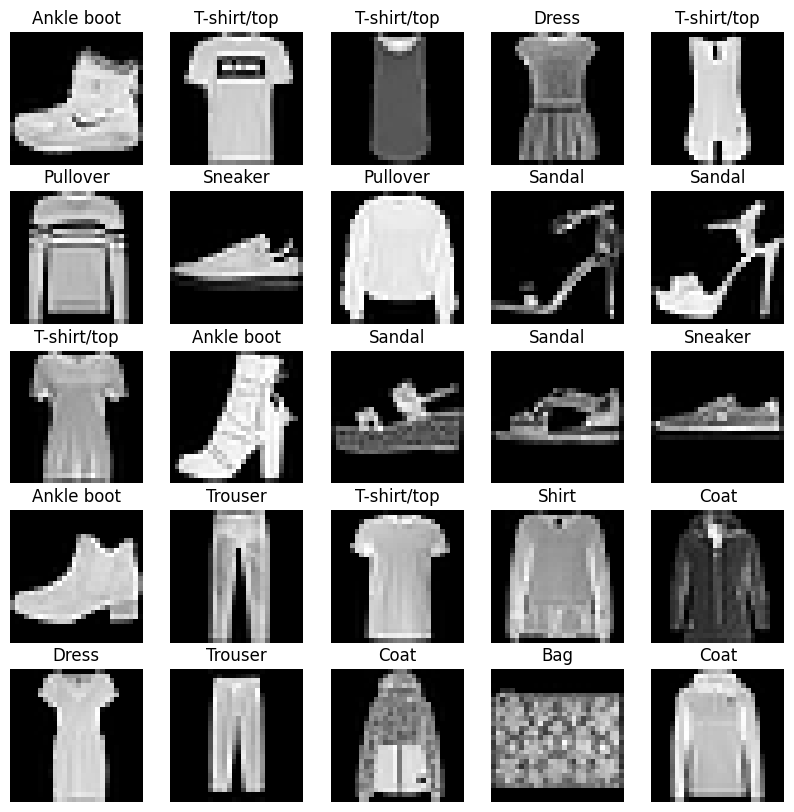

In [7]:
# Clases
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualizar las primeras 25 imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    img = X[i].reshape(28,28)   # Reconstruir la imagen 28x28
    plt.subplot(5,5,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(class_names[y[i]])
plt.show()

*División de entrenamiento y prueba*

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=14000, random_state=42, stratify=y)

Del total de las imágenes que cuenta el dataset, decir el 80% serán destinadas como conjunto de entrenamiento, mientras que el 20% restantes serán utilizadas como el conjunto de prueba.

*Estandarización*

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

Para SVM, Regresión Logística y MLP, se aplicó estandarización, transformando cada píxel para que tenga media cero y desviación estándar uno.

La estandarización evita que características con valores más altos dominen el entrenamiento y mejora la convergencia de los modelos.

*PCA*

In [10]:
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

Se aplicó PCA (Análisis de Componentes Principales) para reducir las dimensiones con las que se están trabajando, ya que al ser las imágenes 28x28 son 784 características, lo que hace más tardado el entrenamiento de los modelos. PCA nos permite reducir la dimensionalidad del dataset sin perder información importanto, optimizando a la vez el tiempo de ejecución.

## <font color= #d4b1e6> **Regresión Logística** </font>

In [11]:
# Entrenar Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver="saga", multi_class="multinomial", n_jobs=-1)
logreg.fit(X_train_pca, y_train)

# Predecir
y_pred_log = logreg.predict(X_val_pca)


c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*Explicación de hiperparámetros:*
- max_iter=1000: número máximo de iteraciones para asegurar la convergencia del modelo.
- solver="saga": eficiente para problemas de clasificación multiclase
-  multi_class="multinomial": permite al modelo predecir de forma directa entre varias clases.
- n_jobs=-1: paralelizar los cálculos para reducir el tiempo de entrenamiento.

*Métrica de desempeño*

In [12]:
# Métricas de desempeño
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_log, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_log, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log, average='macro'):.4f}")

Exactitud (Accuracy): 0.8472
Precisión (Precision): 0.8459
Sensibilidad (Recall): 0.8472
F1-Score: 0.8461


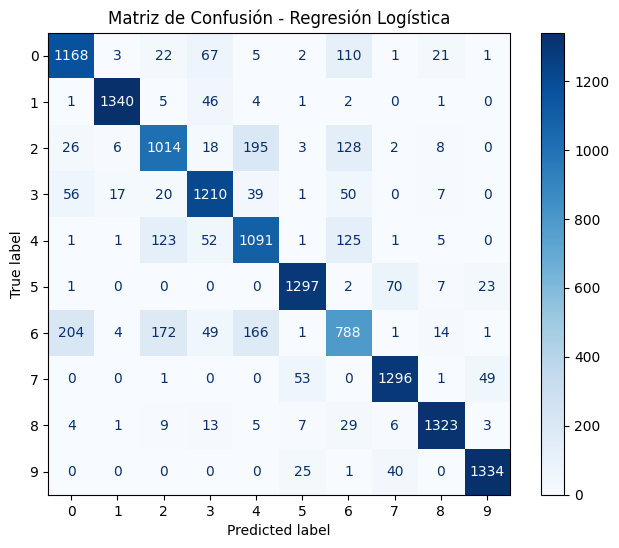

In [13]:
# Matriz de confusión
cm_rl = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rl, display_labels=logreg.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

## <font color= #d4b1e6> **SVM** </font>

In [14]:
svm_clf = SVC(kernel="rbf", C=10, gamma= 0.001, random_state=42)
svm_clf.fit(X_train_pca, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


*Explicación de hiperparámetros:*
- kernel = rbf: El kernel define cómo transforma los datos para poder separarlos. "rbf" (Radial Basis Function) es un kernel no lineal muy usado.
- C=10: C controla el grado de penalización por errores de clasificación.
- gamma = 0.001: gamma define la curvatura de la frontera de decisión
- random_state = 42: Es una semilla aleatoria usada para mantener los resultados reproducibles.

*Métricas de desempeño*

In [15]:
# Métricas de desempeño
y_pred_svm = svm_clf.predict(X_val_pca)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

Exactitud (Accuracy): 0.8993
Precisión (Precision): 0.8989
Sensibilidad (Recall): 0.8993
F1-Score: 0.8987


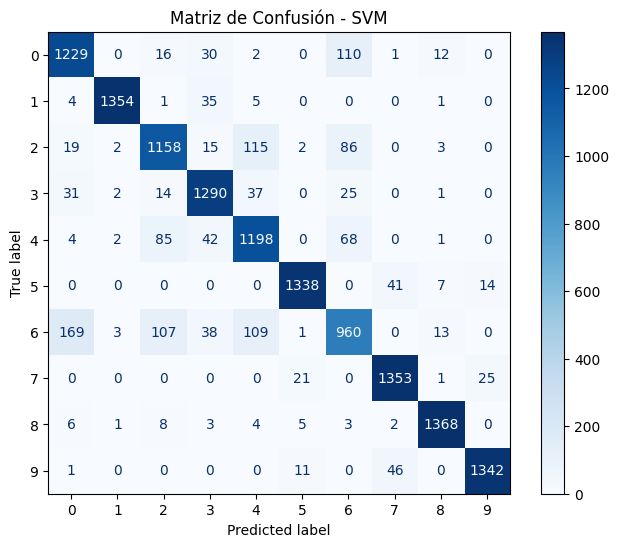

In [16]:
# Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_clf.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - SVM")
plt.show()

## <font color= #d4b1e6> **Random Forest** </font>

In [17]:
rf = RandomForestClassifier(
    n_estimators=100,      
    max_depth=None,       
    random_state=96,       
    n_jobs=1,
    min_samples_split=2,
    min_samples_leaf=1
)

rf.fit(X_train_pca, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- n_estimators: número de árboles que se construirán en el bosque, sirve para mejorar la estabilidad y precisión del modelo.

- max_depth: profundidad máxima de cada árbol (None = sin límite), sirve para controlar la complejidad y evitar sobreajuste.

- random_state: semilla que fija la aleatoriedad, sirve para obtener siempre los mismos resultados al entrenar.

- n_jobs: cantidad de núcleos de CPU usados en el entrenamiento (1 = un núcleo), sirve para controlar el paralelismo y el uso de recursos.

- min_samples_split: número mínimo de muestras requerido para dividir un nodo, sirve para evitar divisiones innecesarias y controlar sobreajuste.

- min_samples_leaf: número mínimo de muestras en una hoja, sirve para asegurar que las hojas tengan suficiente información y evitar que sean muy pequeñas.

In [18]:
y_pred_rf = rf.predict(X_val_pca)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

Exactitud (Accuracy): 0.8651
Precisión (Precision): 0.8637
Sensibilidad (Recall): 0.8651
F1-Score: 0.8627


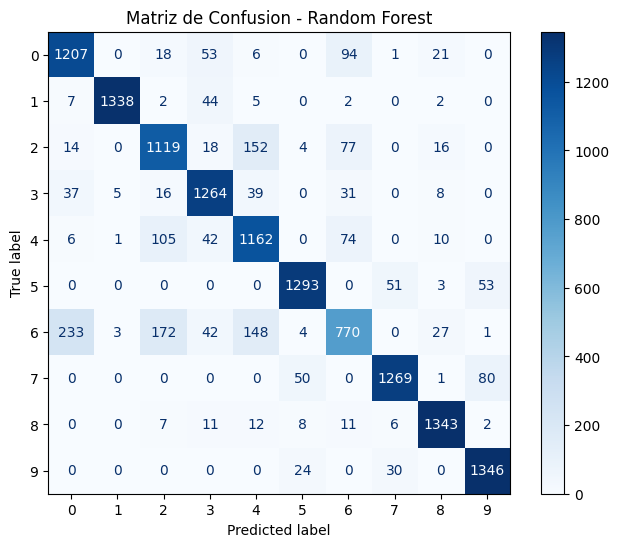

In [19]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)

plt.figure(figsize=(8,6))
disp_rf.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusion - Random Forest")
plt.show()


## <font color= #d4b1e6> **Redes Neuronales MLP** </font>

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42, verbose=True)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_val_pca)


Iteration 1, loss = 0.68344292
Iteration 2, loss = 0.38334277
Iteration 3, loss = 0.33912128
Iteration 4, loss = 0.31207327
Iteration 5, loss = 0.29080449
Iteration 6, loss = 0.27522995
Iteration 7, loss = 0.26025151
Iteration 8, loss = 0.24814533
Iteration 9, loss = 0.23875629
Iteration 10, loss = 0.22763530
Iteration 11, loss = 0.21846813
Iteration 12, loss = 0.21224825
Iteration 13, loss = 0.20487637
Iteration 14, loss = 0.19749302
Iteration 15, loss = 0.19092898
Iteration 16, loss = 0.18499831
Iteration 17, loss = 0.18051021
Iteration 18, loss = 0.17472957
Iteration 19, loss = 0.17073770
Iteration 20, loss = 0.16467654
Iteration 21, loss = 0.15973420
Iteration 22, loss = 0.15511707
Iteration 23, loss = 0.15211905
Iteration 24, loss = 0.14875035
Iteration 25, loss = 0.14405690
Iteration 26, loss = 0.14034643
Iteration 27, loss = 0.13764207
Iteration 28, loss = 0.13556817
Iteration 29, loss = 0.13154170
Iteration 30, loss = 0.12814771
Iteration 31, loss = 0.12576246
Iteration 32, los

c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


*Explicación de hiperparámetros:*
- hidden_layer_sizes=(128,):  una capa oculta con 128 neuronas para capturar patrones complejos en las imágenes
- max_iter=100: úmero máximo de iteraciones del optimizador.
- random_state=42: semilla aleatoria para hacer los resultados reproducibles(si corres otra vez el código obtienes los mismos resultados)
- verbose=True: ver en la consola cómo va el entrenamiento

*Métrica de desempeño*

In [21]:
# Métricas de desempeño
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_mlp, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_mlp, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_mlp, average='macro'):.4f}")

Exactitud (Accuracy): 0.8740
Precisión (Precision): 0.8749
Sensibilidad (Recall): 0.8740
F1-Score: 0.8744


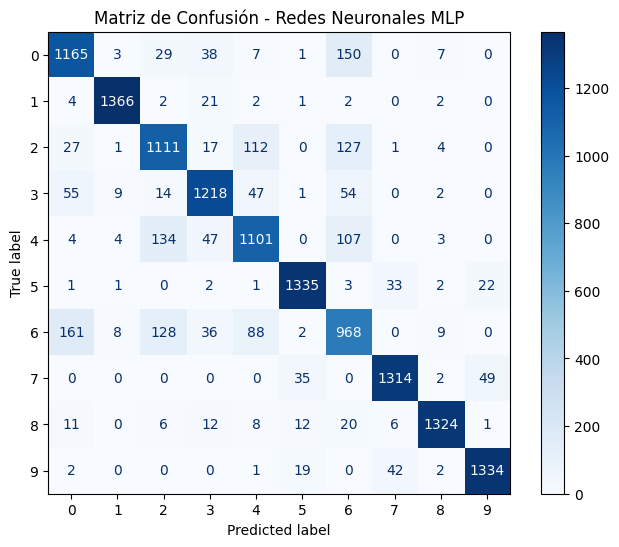

In [22]:
# Matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=np.unique(y_test))
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - Redes Neuronales MLP")
plt.show()

## <font color= #d4b1e6> **CNN** </font>

In [44]:
# Preparar datos (N,1,28,28)
X_train_t = torch.tensor(X_train, dtype=torch.float32).reshape(-1,1,28,28) / 255.0
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test, dtype=torch.float32).reshape(-1,1,28,28) / 255.0
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoader con mini-batches (por el RAM)
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definir modelo CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Configurar dispositivo, optimizador y loss
device = "cuda" if torch.cuda.is_available() else "cpu"
cnn = CNN().to(device)
opt = optim.Adam(cnn.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Entrenamiento con mini-batches
for epoch in range(3):
    cnn.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        opt.zero_grad()
        out = cnn(X_batch)
        loss = loss_fn(out, y_batch)
        loss.backward()
        opt.step()
        running_loss += loss.item()
    print(f"Época {epoch+1}, Pérdida promedio: {running_loss/len(train_loader):.4f}")

# Evaluación
cnn.eval()
y_pred_cnn = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        preds = cnn(X_batch).argmax(dim=1)
        y_pred_cnn.extend(preds.cpu().numpy())


Época 1, Pérdida promedio: 0.4776
Época 2, Pérdida promedio: 0.3042
Época 3, Pérdida promedio: 0.2566


*Explicación de hiperparámetros:*
- batch_size=64: número de imágenes que se procesan juntas en cada iteración, sirve para equilibrar el uso de memoria y la estabilidad del entrenamiento.
- shuffle=True: mezcla aleatoriamente los datos de entrenamiento en cada época, sirve para evitar que el modelo aprenda un orden específico en lugar de patrones generales.
- conv1 = nn.Conv2d(1, 32, 3, padding=1): primera capa convolucional con 32 filtros de tamaño 3x3; padding=1 conserva las dimensiones de la imagen. Sirve para extraer características simples (bordes, texturas).
- conv2 = nn.Conv2d(32, 64, 3, padding=1): segunda capa convolucional con 64 filtros de tamaño 3x3. Sirve para aprender características más complejas y abstractas.
- fc1 = nn.Linear(64*7*7, 128): capa densa totalmente conectada con 128 neuronas, sirve como puente entre la extracción de características y la clasificación.
- fc2 = nn.Linear(128, 10): capa de salida con 10 neuronas (una por cada clase de Fashion-MNIST).
- optim.Adam(lr=0.001): optimizador Adam con tasa de aprendizaje 0.001, sirve para ajustar los pesos del modelo durante el entrenamiento.
- loss_fn = nn.CrossEntropyLoss(): función de pérdida de entropía cruzada, estándar para problemas de clasificación multiclase.
- epoch=3: número de veces que el modelo ve todo el conjunto de entrenamiento, sirve para mejorar la precisión repitiendo el proceso de ajuste varias veces.

*Métrica de desempeño*

In [45]:
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_cnn):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_cnn, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_cnn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_cnn, average='macro'):.4f}")


Exactitud (Accuracy): 0.8993
Precisión (Precision): 0.8998
Sensibilidad (Recall): 0.8993
F1-Score: 0.8983


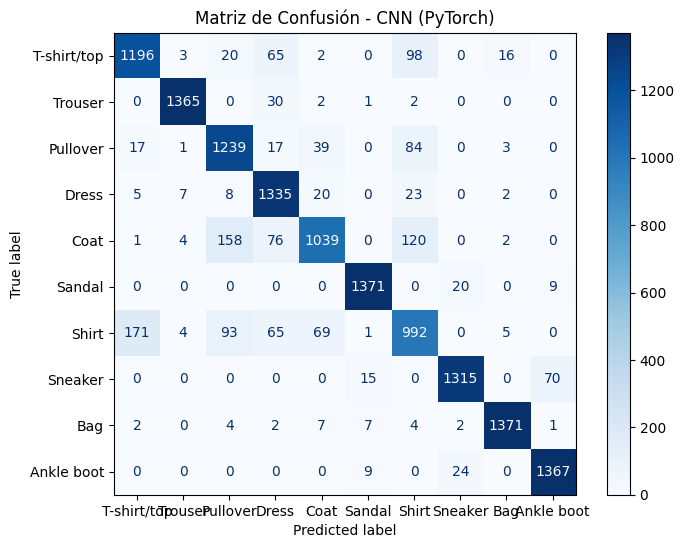

In [46]:
# Matriz de confusión
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=class_names)
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - CNN (PyTorch)")
plt.show()

## <font color= #d4b1e6> **Imágenes** </font>

In [34]:
image_paths = ["fashion_items/bag1.jpeg", "fashion_items/bag2.jpeg", "fashion_items/bag3.jpeg", 
               "fashion_items/dress1.jpeg", "fashion_items/dress2.jpeg", "fashion_items/dress3.jpeg",
               "fashion_items/sandals1.jpeg", "fashion_items/sandals2.jpeg", "fashion_items/sandals3.jpeg", 
               "fashion_items/ankleboots1.jpeg", "fashion_items/ankleboots2.jpeg", "fashion_items/ankleboots3.jpeg",
               "fashion_items/sneakers1.jpeg", "fashion_items/sneakers2.jpeg", "fashion_items/sneakers3.jpeg",
               "fashion_items/coat1.jpg", "fashion_items/coat2.jpg", "fashion_items/coat3.jpeg", "fashion_items/trouser1.jpeg",
               "fashion_items/trouser2.jpeg", "fashion_items/trouser1.jpeg", "fashion_items/pullover1.jpeg", "fashion_items/pullover2.jpeg",
               "fashion_items/pullover3.jpeg", "fashion_items/shirt1.jpg", "fashion_items/shirt2.jpg", "fashion_items/shirt3.jpg",
               "fashion_items/t-shirt1.jpg", "fashion_items/t-shirt2.jpg", "fashion_items/tshirt3.jpg"]

In [35]:
def preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).convert("L")   # Escala de grises
        img = img.resize((28,28))             # Redimensionar
        img = ImageOps.invert(img)            # Invertir -> prenda negra, fondo blanco
        arr = np.array(img).flatten()         # Vector de 784
        images.append(arr)
    return np.array(images)

In [36]:
X_new = preprocess_images(image_paths)  


*Escalamos las imágentes*

In [37]:
X_new_scaled = scaler.transform(X_new)

*Hacemos PCA*

In [38]:
X_new_pca = pca.transform(X_new_scaled)

*Hacemos predicciones:*

*1. Regresión*

In [39]:
y_pred_new_log = logreg.predict(X_new_pca)

*2. SVM*

In [40]:
y_pred_new_svm = svm_clf.predict(X_new_pca)

*3. Random Forest*

In [41]:
y_pred_new_rf = rf.predict(X_new_pca)

*4. Redes MLP*

In [42]:
y_pred_new_mlp = mlp.predict(X_new_pca)

*5. CNN*

In [49]:
# Preprocesar imágenes nuevas para la CNN
def preprocess_images_cnn(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).convert("L")   # Escala de grises
        img = img.resize((28,28))             # Redimensionar a 28x28
        img = ImageOps.invert(img)            # Fondo blanco, prenda negra
        arr = np.array(img, dtype=np.float32) / 255.0  # Normalizar [0,1]
        images.append(arr)
    images = np.array(images).reshape(-1, 1, 28, 28)  # (N,1,28,28) para CNN
    return torch.tensor(images, dtype=torch.float32)

X_new_cnn = preprocess_images_cnn(image_paths)

# Predicciones con la CNN
cnn.eval()
with torch.no_grad():
    y_pred_new_cnn = cnn(X_new_cnn.to(device)).argmax(dim=1).cpu().numpy()

*Resultados:*

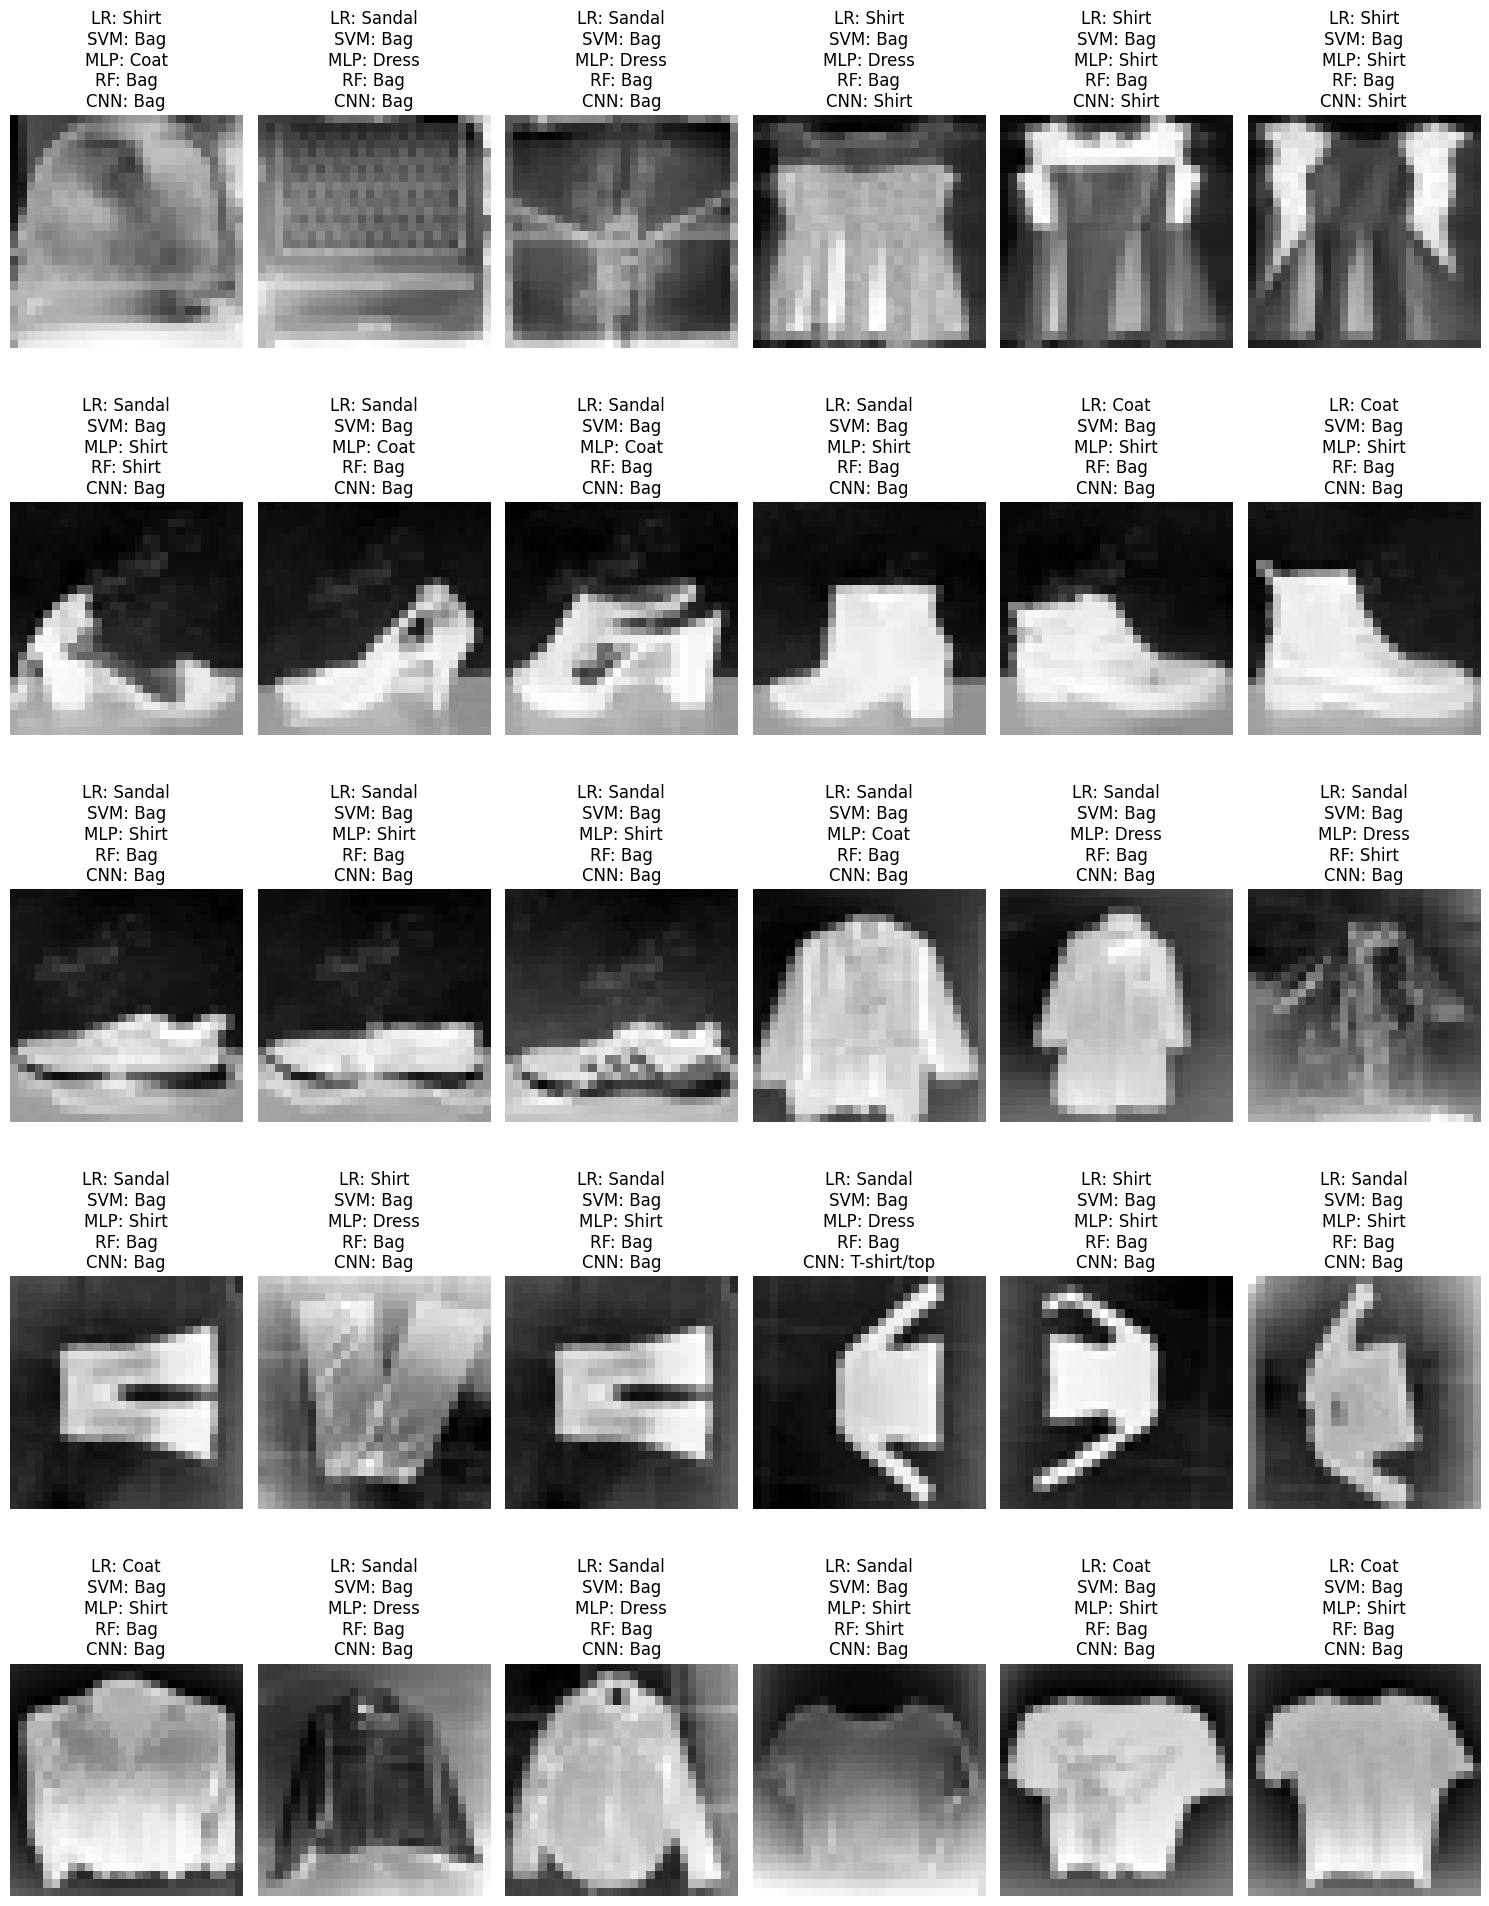

In [50]:
plt.figure(figsize=(15,20))
for i, path in enumerate(image_paths):
    img = X_new[i].reshape(28,28)
    plt.subplot(5, 6, i+1)  # Adjusted to fit more images nicely
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(
        f"LR: {class_names[y_pred_new_log[i]]}\n"
        f"SVM: {class_names[y_pred_new_svm[i]]}\n"
        f"MLP: {class_names[y_pred_new_mlp[i]]}\n"
        f"RF: {class_names[y_pred_new_rf[i]]}\n"
        f"CNN: {class_names[y_pred_new_cnn[i]]}"
    )
plt.tight_layout()
plt.show()

## <font color= #d4b1e6> **Conclusión** </font>

*Comparación de resultados*

| Modelo | Accuracy | F1-Score |
|------------|-------|-------|
| Regresión logística|0.8472|0.8461|  
| SVM                |0.8993|0.8987|
| Random Forest      |0.8651|0.8627|
| Redes Neuronales   |0.8740|0.8744|
| CNN                |0.9019|0.9012|

Dado que el dataset se encuentra balanceado, tanto la exactitud como el F1-Score son métricas adecuadas para evaluar el desempeño de los modelos. Los resultados muestran que la CNN obtuvo el mejor rendimiento (Accuracy = 0.9019, F1 = 0.9012).

En conclusión CNN destacó como el modelo más robusto.